## 1)LOAD MNIST DIGIT DATA FROM KERAS LIBRARY.SPLIT THE SAME AS TRAIN-TEST

## Importing Dataset:

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

In [ ]:
data

type(data)

tuple

## Split the Dataset into Train and Test

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras.utils import np_utils

print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

(10000,)
(10000, 10)


### Model Buliding

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(32, input_dim = 28 * 28, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
model.fit(X_train, y_train, epochs= 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4331 - accuracy: 0.8734
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1939 - accuracy: 0.9436
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1532 - accuracy: 0.9560
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1287 - accuracy: 0.9619
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1115 - accuracy: 0.9666
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0969 - accuracy: 0.9705
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0859 - accuracy: 0.9737
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0706 - accuracy: 0.9779
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0631 - accuracy: 0.9800

## Predicting Accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.0980 - accuracy: 0.9700
Accuracy:  97.00000286102295


## 2) scale input value between 0 to 1

In [ ]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X = np.array([
    [ 0,  1],
    [ 2,  3],
    [ 4,  5],
    [ 6,  7],
    [ 8,  9],
    [10, 11],
    [12, 13],
    [14, 15]
])

scaled_x = NormalizeData(X)

print(scaled_x)

[[0.         0.06666667]
 [0.13333333 0.2       ]
 [0.26666667 0.33333333]
 [0.4        0.46666667]
 [0.53333333 0.6       ]
 [0.66666667 0.73333333]
 [0.8        0.86666667]
 [0.93333333 1.        ]]


## 3) display random image and its labels from training dataset

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import os 

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/archive (1).zip')

## 6)plot train and validation loss curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
digits = datasets.load_iris()

X, y = digits.data, digits.target

In [ ]:
param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

 

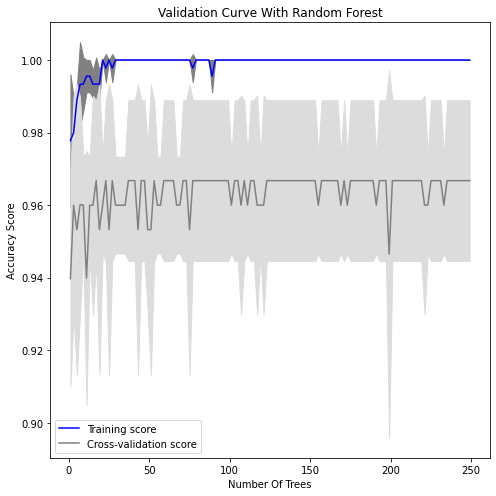

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="grey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()